# Initial Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import tensorflow as tf
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
np.random.seed(42)
tf.random.set_seed(42)
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
import nltk, string, re, spacy,unicodedata, random
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
### Pretrained Word Embeddings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


CPU times: user 9.64 s, sys: 1.57 s, total: 11.2 s
Wall time: 25.6 s


# Import Data

In [ ]:
#Atrain = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/case/SubTask-A-train.csv")
#Btrain = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/case/SubTask-B-train.csv")
Ctrain = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CASE 2024/SubTask-C-train.csv")

#Aval_tweet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-A-(index,tweet)val.csv')
#Aval_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-A(index,label)val.csv')

#Bval_tweet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-B(index,tweet)val.csv')
#Bval_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-B(index,label)val.csv')

Cval_tweet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CASE 2024/SubTask-C(index,tweet)val.csv')
Cval_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CASE 2024/SubTask-C(index,label)val.csv')

#Atest_tweet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-A-(index,tweet)test.csv')
#Btest_tweet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-B(index,tweet)test.csv')
Ctest_tweet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CASE 2024/SubTask-C(index,tweet)test.csv')

#Atest_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-A(index,label)test.csv')
#Btest_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/case/SubTask-B(index,label)test.csv')
Ctest_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CASE 2024/SubTask-C(index,label)test (1).csv')


In [ ]:
#print("Total number of training samples train set - task 1:", len(Atrain))
#print("Total number of training samples dev set - task 1:", len(Aval_tweet))
#print("Total number of training samples test set - task 1:", len(Atest_tweet))


In [ ]:
#print("Total number of training samples train set - task 2:", len(Btrain))
#print("Total number of training samples dev set - task 2:", len(Bval_tweet))
#print("Total number of training samples test set - task 2:", len(Btest_tweet))

In [ ]:
print("Total number of training samples train set - task 3:", len(Ctrain))
print("Total number of training samples dev set - task 3:", len(Cval_tweet))
print("Total number of training samples test set - task 3:", len(Ctest_tweet))

Total number of training samples train set - task 3: 7284
Total number of training samples dev set - task 3: 1561
Total number of training samples test set - task 3: 1562


In [ ]:
Ctrain.head()

,index,tweet,label
0,10001,Burning native forest wood waste for electrici...,1
1,10002,November is here!!! \nIt's a new chance for yo...,1
2,10003,Fight For Climate Justice At Queen's Park. In...,1
3,10005,We all need to rise up and speak at a time lik...,1
4,10006,Fridays For Future Week 88🌍 \n\n#PeopleNotProf...,3


In [ ]:
Ctrain.tail()

,index,tweet,label
7279,20399,"Fridays for Future :: Nov 18, Noon - Palo Alto...",1
7280,20400,Global #ClimateStrike today! #TakeAction on #C...,1
7281,20403,No more empty promises\nStop the funding Of No...,3
7282,20404,Young people are not only victims of climate c...,1
7283,20406,#FridaysForFuture #EverydayForFuture Here I am...,1


In [ ]:
Ctest_tweet.head()

,index,tweet
0,10000,british govt/msm sheer hypocrisy!!! ‘Out of re...
1,10004,This #FridaysForFuture on Zoom we will get boo...
2,10012,The #ecoteam at SMAB have been busy today! The...
3,10015,The fight against climate justice is for both ...
4,10031,The world needs more environmentalists \n#biod...


In [ ]:
Cval_tweet.head(5)

,index,tweet
0,10023,#FridaysForFuture\n\n#COP27 #Live Today\n#Clim...
1,10042,Do we really have an average of 6-7 years to c...
2,10044,today it's #climatestrike Again&amp;Again #Unt...
3,10067,Join the Global #ClimateStrike on September 23...
4,10083,Happy #EarthDay! Prioritize Life!\n\nReduce #F...


In [ ]:
Cval_label.head(5)

,index,label
0,10023,3
1,10042,1
2,10044,3
3,10067,1
4,10083,1


In [ ]:
# Get the unique identifiers from both dataframes
identifiers_tweet = set(Cval_tweet['index'])
identifiers_label = set(Cval_label['index'])

# Find common identifiers using intersection
common_identifiers = identifiers_tweet.intersection(identifiers_label)

# Print common identifiers
print("Common Identifiers:", common_identifiers)

# Check if there are any common identifiers
if common_identifiers:
    print("There are common identifiers.")
else:
    print("No common identifiers found.")


Common Identifiers: {16385, 16389, 16391, 16396, 16404, 16407, 16416, 16425, 16432, 16433, 16436, 16458, 16464, 16465, 16467, 16486, 16492, 16499, 16505, 16506, 16533, 16553, 16558, 16560, 16561, 16564, 16565, 16568, 16578, 16579, 16593, 16604, 16607, 16616, 16619, 16622, 16624, 16631, 16652, 16663, 16667, 16668, 16669, 16682, 16695, 16697, 16701, 16714, 16719, 16720, 16722, 16723, 16731, 16734, 16735, 16739, 16742, 16743, 16750, 16752, 16759, 16766, 16775, 16778, 16790, 16791, 16803, 16814, 16815, 16827, 16841, 16846, 16875, 16878, 16880, 16881, 16882, 16898, 16902, 16909, 16916, 16924, 16925, 16932, 16934, 16941, 16946, 16954, 16959, 16961, 17000, 17005, 17007, 17011, 17021, 17028, 17030, 17040, 17042, 17067, 17083, 17086, 17091, 17094, 17112, 17120, 17123, 17133, 17147, 17160, 17164, 17168, 17169, 17175, 17192, 17194, 17212, 17216, 17218, 17226, 17227, 17229, 17231, 17255, 17258, 17265, 17266, 17282, 17283, 17289, 17291, 17299, 17302, 17304, 17306, 17316, 17333, 17343, 17347, 17363,

In [ ]:
import pandas as pd

# Assuming 'identifier' is the common column in both dataframes
# Concatenate Aval_tweet and Aval_label along columns (axis=1)
Cval = pd.concat([Cval_tweet.set_index('index'), Cval_label.set_index('index')], axis=1)

# Drop any rows with NaN values (if any)
Cval = Cval.dropna()

# Reset the index to make 'identifier' a regular column again
Cval.reset_index(inplace=True)

# Print the resulting DataFrame
Cval

,index,tweet,label
0,10023,#FridaysForFuture\n\n#COP27 #Live Today\n#Clim...,3
1,10042,Do we really have an average of 6-7 years to c...,1
2,10044,today it's #climatestrike Again&amp;Again #Unt...,3
3,10067,Join the Global #ClimateStrike on September 23...,1
4,10083,Happy #EarthDay! Prioritize Life!\n\nReduce #F...,1
...,...,...,...
1556,20376,"The #ClimateCrisis tide continues to rise, fol...",3
1557,20378,"#GlobalClimateStrike in Lagos,Nigeria today ev...",1
1558,20392,#Greenwashing #Renewables #ClimateStrike #Exti...,2
1559,20402,#ExtinctionRebellion #ClimateCrisis #Clima...,2


In [ ]:
import pandas as pd

# Assuming 'identifier' is the common column in both dataframes
# Concatenate Aval_tweet and Aval_label along columns (axis=1)
Ctest = pd.concat([Ctest_tweet.set_index('index'), Ctest_label.set_index('index')], axis=1)

# Drop any rows with NaN values (if any)
Ctest = Ctest.dropna()

# Reset the index to make 'identifier' a regular column again
Ctest.reset_index(inplace=True)

# Print the resulting DataFrame
Ctest

,index,tweet,label
0,10000,british govt/msm sheer hypocrisy!!! ‘Out of re...,1
1,10004,This #FridaysForFuture on Zoom we will get boo...,1
2,10012,The #ecoteam at SMAB have been busy today! The...,3
3,10015,The fight against climate justice is for both ...,1
4,10031,The world needs more environmentalists \n#biod...,1
...,...,...,...
1557,20391,#ClimateChange #Greenwashing #Renewables #Cli...,2
1558,20394,🌍🌿👇 Solidarity Cora and everyone below..! ✌️💚🌱...,1
1559,20395,"Welcome to the world of extreme heat, extreme ...",3
1560,20398,+++ Save the Date +++\nThe next #FridaysForFut...,1


# Data Set Analysis

In [ ]:
print(Ctrain['label'].value_counts())
print(Cval_label['label'].value_counts())

1    4328
3    2256
2     700
Name: label, dtype: int64
1    897
3    511
2    153
Name: label, dtype: int64


In [ ]:
train_corpus = Ctrain["tweet"].sum()
test_corpus = Ctest["tweet"].sum()
#test_corpus

In [ ]:
import re

# Remove punctuations
chars_to_ignore = '[-,\.:;\'"\!?।]'

train_corpus = re.sub(chars_to_ignore, ' ', train_corpus)
train_vocab = set(train_corpus.split())

test_corpus = re.sub(chars_to_ignore, ' ', test_corpus)
test_vocab = set(test_corpus.split())

oov = test_vocab - train_vocab

print("Number of unique words in training data:", len(train_vocab))
print("Number of unique words in test data:", len(test_vocab))
print("Number of out-of-vocabulary (OOV) words:", len(oov))

Number of unique words in training data: 29021
Number of unique words in test data: 9970
Number of out-of-vocabulary (OOV) words: 4204


In [ ]:
filtered_train = Ctrain[lambda x: x["tweet"].str.contains("[^A-Za-z0-9]")]

with pd.option_context('display.max_colwidth', 0):
    display(filtered_train.tail(n=5))

,index,tweet,label
7279,20399,"Fridays for Future :: Nov 18, Noon - Palo Alto Civic Center (Week #45) - https://t.co/S3s9foxY3g\n#FridaysForFuture\n#PeopleNotProfit\n#ClimateStrike\n#ClimateActionNow\n#GlobalWarming\n@FFFUnitedStates\n@polimatt1 https://t.co/k4402dNCtf",1
7280,20400,Global #ClimateStrike today! #TakeAction on #ClimateChange! \n\nLet's start making a difference today! #SaveTheWorld #TakeActionNow #MakeADifference\n\nThank you #FridaysForFuture! \n\nMore on the #climatecrisis: \nhttps://t.co/mHOk8MnsBa https://t.co/9LuKpeaQ85,1
7281,20403,No more empty promises\nStop the funding Of Nonrenewables\nClimate Justice\n#STOP EACOP to save the Environment\n#FridaysForFuture,3
7282,20404,Young people are not only victims of climate change. They're also valuable contributors to climate action. We had a productive interactive session with climate change ambs on the way forward of rolling out greening activities at @KenyattaUni \n#climate \n#FridaysForFuture https://t.co/oNJcdDdSGD,1
7283,20406,#FridaysForFuture #EverydayForFuture Here I am in front of the #GlobalGoals display that my students made. They wrote persuasive letters to our Mayor asking him to make sure all schools in #Leuven and the world teach children about the #SDGs and next week he will visit our class! https://t.co/XxSjFbMPlo,1


In [ ]:
filtered_train.shape

(7284, 3)

## Check For Codemixed

In [ ]:
filtered_train = Ctrain[Ctrain['tweet'].str.contains('[A-Za-z]+') & Ctrain['tweet'].str.contains('[^A-Za-z]+')]
with pd.option_context('display.max_colwidth', 0):
    display(filtered_train.tail(n=5))

,index,tweet,label
7279,20399,"Fridays for Future :: Nov 18, Noon - Palo Alto Civic Center (Week #45) - https://t.co/S3s9foxY3g\n#FridaysForFuture\n#PeopleNotProfit\n#ClimateStrike\n#ClimateActionNow\n#GlobalWarming\n@FFFUnitedStates\n@polimatt1 https://t.co/k4402dNCtf",1
7280,20400,Global #ClimateStrike today! #TakeAction on #ClimateChange! \n\nLet's start making a difference today! #SaveTheWorld #TakeActionNow #MakeADifference\n\nThank you #FridaysForFuture! \n\nMore on the #climatecrisis: \nhttps://t.co/mHOk8MnsBa https://t.co/9LuKpeaQ85,1
7281,20403,No more empty promises\nStop the funding Of Nonrenewables\nClimate Justice\n#STOP EACOP to save the Environment\n#FridaysForFuture,3
7282,20404,Young people are not only victims of climate change. They're also valuable contributors to climate action. We had a productive interactive session with climate change ambs on the way forward of rolling out greening activities at @KenyattaUni \n#climate \n#FridaysForFuture https://t.co/oNJcdDdSGD,1
7283,20406,#FridaysForFuture #EverydayForFuture Here I am in front of the #GlobalGoals display that my students made. They wrote persuasive letters to our Mayor asking him to make sure all schools in #Leuven and the world teach children about the #SDGs and next week he will visit our class! https://t.co/XxSjFbMPlo,1


In [ ]:
filtered_train.shape

(7284, 3)

In [ ]:
import pandas as pd
import re

# Assuming 'tweet' is the column where you want to find and count similar URLs
tweets = Ctrain['tweet']

# Define a regular expression to extract URLs
url_pattern = re.compile(r'https?://\S+|www\.\S+')

# Extract URLs from each tweet
all_urls = [url_pattern.findall(tweet) for tweet in tweets]

# Flatten the list of lists into a single list
all_urls_flat = [url for sublist in all_urls for url in sublist]

# Create a DataFrame to count the occurrences of each URL
url_df = pd.DataFrame(all_urls_flat, columns=['URL'])
url_frequency = url_df['URL'].value_counts()

# Display the count of occurrences for each unique URL
print("URL Frequency:")
print(url_frequency)


URL Frequency:
https://t.co/26T1X3q8V8    10
https://t.co/p9Y5Cv5hrh     8
https://t.co/w9adRhI5PN     6
https://t.co/C8WvupADPo     5
https://t.co/5NjMYlDUn8     5
                           ..
https://t.co/tgMTe5OYWd     1
https://t.co/HNLVPrQwY3     1
https://t.co/ZXSSO6vZHb     1
https://t.co/8ojeeDT0zM     1
https://t.co/XxSjFbMPlo     1
Name: URL, Length: 5340, dtype: int64


In [ ]:
import pandas as pd
import re

# Assuming 'tweet' is the column where you want to find and compare URLs
train_tweets = Ctrain['tweet']
test_tweets = Ctest['tweet']

# Define a regular expression to extract URLs
url_pattern = re.compile(r'https?://\S+|www\.\S+')

# Extract URLs from each tweet in train dataset
train_urls = [url_pattern.findall(tweet) for tweet in train_tweets]
train_urls_flat = [url for sublist in train_urls for url in sublist]

# Extract URLs from each tweet in test dataset
test_urls = [url_pattern.findall(tweet) for tweet in test_tweets]
test_urls_flat = [url for sublist in test_urls for url in sublist]

# Find common URLs between train and test datasets
common_urls = set(train_urls_flat).intersection(test_urls_flat)

# Display common URLs
# print("Common URLs:")
# print(common_urls)

num_common_urls = len(common_urls)
print(f"Number of common URLs: {num_common_urls}")


Number of common URLs: 59


# Preprocessing

In [ ]:
# import re
# from collections import Counter

# # Assuming Btrain['tweet'] is a pandas Series containing the tweets
# all_tokens = []

# for tweet in Btrain['tweet']:
#     # Find all tokens starting with a hash(#) or at the rate(@) and followed by some number of alphabets or numbers
#     matches = re.findall(r'[@#][_a-zA-Z0-9]+', tweet)

#     # Extend the list of all tokens with the matches for each tweet
#     all_tokens.extend(matches)

# # Count the occurrences of each token
# token_counts = Counter(all_tokens)

# # Display tokens sorted by count
# sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# for token, count in sorted_tokens:
#     print(f"{token}: {count}")


In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji = re.compile("["         # this emoj is to remove all emojis
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u00C0-\u017F"          #latin
        u"\u2000-\u206F"          #generalPunctuations
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030" "]+", re.UNICODE)

    text = text.lower()
    url_pattern = r'https?://\S+|www\.\S+'
    text = re.sub(url_pattern, ' ', text)

    text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'(https|http|www)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', ' ', text, flags=re.MULTILINE)
    # emoji removal
    text = emoji.sub(r' ',text)
    # text = re.sub(r'[@#][_a-zA-Z0-9]+', ' ', text)
    text = text.replace('\n', ' ')
    text = text.replace('—', ' ')
    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*=৳।!/_:.()-[]{};'"“\’,<>?@#$%^&*~‘—॥”‰￰৷￰'''
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char
        else :
            no_punct = no_punct + " "

    no_punct = re.sub(r'\s+', ' ', no_punct)  #replace multiple space with single space

    return no_punct

def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [ ]:
Ctrain['cleanText'] = Ctrain.tweet.apply(lambda x: preprocessing(str(x)))
Cval['cleanText'] = Cval.tweet.apply(lambda x: preprocessing(str(x)))
Ctest['cleanText'] = Ctest.tweet.apply(lambda x: preprocessing(str(x)))

## Stop Words Removal

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

Ctrain["cleanText"] = Ctrain["cleanText"].apply(lambda text: remove_stopwords(text))
Cval["cleanText"] = Cval["cleanText"].apply(lambda text: remove_stopwords(text))
Ctest["cleanText"] = Ctest["cleanText"].apply(lambda text: remove_stopwords(text))

In [ ]:
Ctrain.head(10)

,index,tweet,label,cleanText
0,10001,Burning native forest wood waste for electrici...,1,burning native forest wood waste electricity c...
1,10002,November is here!!! \nIt's a new chance for yo...,1,november new chance make decisions contribute ...
2,10003,Fight For Climate Justice At Queen's Park. In...,1,fight climate justice queen park toronto ontar...
3,10005,We all need to rise up and speak at a time lik...,1,need rise speak time like climate justice rise...
4,10006,Fridays For Future Week 88🌍 \n\n#PeopleNotProf...,3,fridays future week 88 peoplenotprofit uproott...
5,10007,"Great turnout for Week171 #FridaysforFuture, D...",1,great turnout week171 fridaysforfuture dublin ...
6,10008,There is no climate justice without climate fi...,1,climate justice without climate finance show u...
7,10009,"#FridaysForFuture Dublin, WEEEEEK 200!!Congrat...",1,fridaysforfuture dublin weeeeek 200 congrats i...
8,10010,.\nYouth #climate activists get boost from Dut...,3,youth climate activists get boost dutch tech b...
9,10011,#ClimateCrisis #ClimateAction #GlobalWarming ...,2,climatecrisis climateaction globalwarming frid...


In [ ]:
Cval.head(10)

,index,tweet,label,cleanText
0,10023,#FridaysForFuture\n\n#COP27 #Live Today\n#Clim...,3,fridaysforfuture cop27 live today climateaction
1,10042,Do we really have an average of 6-7 years to c...,1,really average 6 7 years curb tackle halt clim...
2,10044,today it's #climatestrike Again&amp;Again #Unt...,3,today climatestrike untilwearedone fridaysforf...
3,10067,Join the Global #ClimateStrike on September 23...,1,join global climatestrike september 23rd deman...
4,10083,Happy #EarthDay! Prioritize Life!\n\nReduce #F...,1,happy earthday prioritize life reduce fossilfu...
5,10098,We shouldn’t be putting all of our electricity...,1,putting electricity eggs grid basket especiall...
6,10104,Tomorrow is the day! All over the planet peopl...,1,tomorrow day planet people strike march protes...
7,10107,Marine life face mass extinction due to climat...,1,marine life face mass extinction due climate c...
8,10109,#ClimateStrike Week 38\nWe want #ClimateAction...,3,climatestrike week 38 want climateactionnow st...
9,10121,notiammex: RT @DanielBlasing: #ClimateStrike W...,3,notiammex rt danielblasing climatestrike week ...


## Lemmatization

In [ ]:
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()
# wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
# def lemmatize_words(text):
#     pos_tagged_text = nltk.pos_tag(text.split())
#     return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])


# Btrain["cleanText"] = Btrain["cleanText"].apply(lambda text: lemmatize_words(text))
# Bval["cleanText"] = Bval["cleanText"].apply(lambda text: lemmatize_words(text))
# Btest["cleanText"] = Btest["cleanText"].apply(lambda text: lemmatize_words(text))

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

2024-01-16 11:32:45.649627: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-16 11:32:45.649686: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-16 11:32:45.651003: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-16 11:32:46.756136: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Function to perform lemmatization using spaCy
def lemmatize_with_spacy(text):
    # Process the text using spaCy
    doc = nlp(text)

    # Extract lemmatized tokens and join them back into a string
    lemmatized_text = " ".join([token.lemma_ for token in doc])

    return lemmatized_text

# Apply the lemmatization function to your DataFrame columns
Ctrain["cleanText"] = Ctrain["cleanText"].apply(lemmatize_with_spacy)
Cval["cleanText"] = Cval["cleanText"].apply(lemmatize_with_spacy)
Ctest["cleanText"] = Ctest["cleanText"].apply(lemmatize_with_spacy)

In [ ]:
Ctrain.head(10)

,index,tweet,label,cleanText
0,10001,Burning native forest wood waste for electrici...,1,burn native forest wood waste electricity clas...
1,10002,November is here!!! \nIt's a new chance for yo...,1,november new chance make decision contribute t...
2,10003,Fight For Climate Justice At Queen's Park. In...,1,fight climate justice queen park toronto ontar...
3,10005,We all need to rise up and speak at a time lik...,1,need rise speak time like climate justice rise...
4,10006,Fridays For Future Week 88🌍 \n\n#PeopleNotProf...,3,friday future week 88 peoplenotprofit uprootth...
5,10007,"Great turnout for Week171 #FridaysforFuture, D...",1,great turnout week171 fridaysforfuture dublin ...
6,10008,There is no climate justice without climate fi...,1,climate justice without climate finance show w...
7,10009,"#FridaysForFuture Dublin, WEEEEEK 200!!Congrat...",1,fridaysforfuture dublin weeeeek 200 congrat in...
8,10010,.\nYouth #climate activists get boost from Dut...,3,youth climate activist get boost dutch tech bi...
9,10011,#ClimateCrisis #ClimateAction #GlobalWarming ...,2,climatecrisis climateaction globalwarme friday...


In [ ]:
Cval.head(10)

,index,tweet,label,cleanText
0,10023,#FridaysForFuture\n\n#COP27 #Live Today\n#Clim...,3,fridaysforfuture cop27 live today climateaction
1,10042,Do we really have an average of 6-7 years to c...,1,really average 6 7 year curb tackle halt clima...
2,10044,today it's #climatestrike Again&amp;Again #Unt...,3,today climatestrike untilwearedone fridaysforf...
3,10067,Join the Global #ClimateStrike on September 23...,1,join global climatestrike september 23rd deman...
4,10083,Happy #EarthDay! Prioritize Life!\n\nReduce #F...,1,happy earthday prioritize life reduce fossilfu...
5,10098,We shouldn’t be putting all of our electricity...,1,put electricity egg grid basket especially one...
6,10104,Tomorrow is the day! All over the planet peopl...,1,tomorrow day planet people strike march protes...
7,10107,Marine life face mass extinction due to climat...,1,marine life face mass extinction due climate c...
8,10109,#ClimateStrike Week 38\nWe want #ClimateAction...,3,climatestrike week 38 want climateactionnow st...
9,10121,notiammex: RT @DanielBlasing: #ClimateStrike W...,3,notiammex rt danielblase climatestrike week 29...


# Remove Duplicate Samples

In [ ]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Assuming Btrain['tweet'] and Btrain['label'] are your tweet and label columns
class_1_tweets = Ctrain[Ctrain['label'] == 0]['cleanText']
class_2_tweets = Ctrain[Ctrain['label'] == 1]['cleanText']

# Tokenize the tweets
class_1_tokens = [token.lower() for tweet in class_1_tweets for token in word_tokenize(tweet)]
class_2_tokens = [token.lower() for tweet in class_2_tweets for token in word_tokenize(tweet)]


# Count the frequency of each token
counter_class_1 = Counter(class_1_tokens)
counter_class_2 = Counter(class_2_tokens)
print(counter_class_1.most_common(20))
print()
print(counter_class_2.most_common(20))
# Find the top 100 common tokens
common_tokens = set(counter_class_1.most_common(50)).intersection(counter_class_2.most_common(50))

# Print common tokens and their frequencies
for token, freq in common_tokens:
    print(f"Token: {token}, Class 1 Frequency: {counter_class_1[token]}, Class 2 Frequency: {counter_class_2[token]}")



[]

[('fridaysforfuture', 4369), ('climate', 1996), ('climatestrike', 1072), ('climatecrisis', 892), ('strike', 874), ('climateaction', 763), ('week', 707), ('peoplenotprofit', 702), ('gretathunberg', 600), ('change', 510), ('climateemergency', 483), ('action', 467), ('people', 447), ('need', 429), ('global', 412), ('future', 404), ('join', 391), ('climatechange', 389), ('we', 377), ('world', 374)]


In [ ]:
# words_to_remove = [, 'climate', 'climBtestrike', 'climatecrisis', 'strike',
#                    'peoplenotprofit', 'climBtestrike', 'climateaction', 'climatecrisis',
#                    'extinctionrebellion', 'climatechange', 'thunberg', 'greta',
#                    'gretathunberg', 'climateemergency', 'climatejustice',
#                    'climateactionnow', 'renewable', 'crisis', 'change', 'action']

# words_to_remove = ['fridaysforfuture']

# def remove_specific_words(text):
#     for word in words_to_remove:
#         text = text.replace(word, '')
#     return text

# Btrain['cleanText'] = Btrain['cleanText'].apply(remove_specific_words)

# Bval['cleanText'] = Bval['cleanText'].apply(remove_specific_words)

# Btest['cleanText'] = Btest['cleanText'].apply(remove_specific_words)


In [ ]:
# Text to search
search_text = "fool greta thunberg"

# Initialize a dictionary to store label-wise frequencies
label_frequencies = {}

# Iterate over each row in Btrain
for index, row in Ctrain.iterrows():
    label = row['label']
    tweet_text = row['cleanText']

    # Check if the search text is present in the tweet text
    if search_text in tweet_text:
        # Increment the count for the label
        label_frequencies[label] = label_frequencies.get(label, 0) + 1

# Display the label-wise frequencies
for label, frequency in label_frequencies.items():
    print(f"Label {label}: {frequency} occurrences")


Label 2: 488 occurrences
Label 1: 1 occurrences


In [ ]:
# for text in Btrain[(Btrain['cleanText'].str.contains('greta thunberg')) & (Btrain['label'] == 3)]['cleanText']:
#     print(text)

In [ ]:
import pandas as pd

# Assuming Atrain['cleanText'] is the column containing the text

# Keep just one row containing that text
one_row = Ctrain[Ctrain['cleanText'].str.contains("fool greta thunberg")].head(1)


# Drop rows containing the specified text
Ctrain = Ctrain[~Ctrain['cleanText'].str.contains("fool greta thunberg")]


# Concatenate the one_row with the original DataFrame
Ctrain = pd.concat([Ctrain, one_row], ignore_index=True)

In [ ]:
# Assuming Btrain is your DataFrame
duplicate_rows = Ctrain[Ctrain.duplicated('cleanText', keep=False)]

# Display the duplicate rows
duplicate_rows.shape


(594, 4)

In [ ]:
# Assuming Btrain is your DataFrame
Ctrain.drop_duplicates(subset='cleanText', keep='first', inplace=True)

In [ ]:
Ctrain['label'].value_counts()

1    4105
3    2115
2     190
Name: label, dtype: int64

# Over Sampling

In [ ]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Assuming you have a DataFrame Ctrain with 'cleanText' and 'label' columns
# Replace this with your actual data

# Sample data (replace this with your actual data)


# Print the class distribution before oversampling
print("Class distribution before oversampling:", Counter(Ctrain['label']))

# Set target counts for oversampling
target_count_class2 = 2000
target_count_class3 = 4000

# Reshape the input data
X = np.array(Ctrain['cleanText']).reshape(-1, 1)
y = np.array(Ctrain['label'])

# Create the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy={2: target_count_class2, 3: target_count_class3}, random_state=42)

# Fit and apply the oversampler to the data
X_train_over, y_train_over = oversampler.fit_resample(X, y)


Ctrain_over = pd.DataFrame({})
# Update the DataFrame with resampled data
Ctrain_over['cleanText'] = X_train_over.flatten()
Ctrain_over['label'] = y_train_over

# Print the class distribution after oversampling
print("Class distribution after oversampling:", Counter(Ctrain_over['label']))

Class distribution before oversampling: Counter({1: 4105, 3: 2115, 2: 190})
Class distribution after oversampling: Counter({1: 4105, 3: 4000, 2: 2000})


# Data Set Visualization

In [ ]:
Ctrain_summary = Ctrain.filter(['cleanText', 'label'])
Ctrain_over_summary = Ctrain_over.filter(['cleanText', 'label'])

def data_summary(dataset):
    tweets = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleanText) for word in t.strip().split()]
    class_label = [k for k, v in dataset.label.value_counts().to_dict().items()]
    # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.label == label].cleanText) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
            counts[word] = counts.get(word, 0) + 1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key=lambda item: item[1], reverse=True)
        # Documents per class
        tweets.append(len(list(dataset[dataset.label == label].cleanText)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ", label)
        print("Number of tweets:{}".format(len(list(dataset[dataset.label == label].cleanText))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k, v in ordered[:10]:
            print("{}\t{}".format(k, v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return tweets, words, u_words, class_label

# Call the function for Btrain
Ctrain_comments, Ctrain_words, Ctrain_u_words, Ctrain_class_names = data_summary(Ctrain_summary)



Class Name :  1
Number of tweets:4105
Number of Words:74452
Number of Unique Words:10513
Most Frequent Words:

fridaysforfuture	4142
climate	1910
climatestrike	976
climatecrisis	831
strike	808
climateaction	712
week	689
peoplenotprofit	666
gretathunberg	588
change	487

Class Name :  3
Number of tweets:2115
Number of Words:37360
Number of Unique Words:7463
Most Frequent Words:

fridaysforfuture	2148
climate	823
climatestrike	544
climatecrisis	501
climatechange	329
week	314
climateaction	294
strike	278
peoplenotprofit	277
change	261

Class Name :  2
Number of tweets:190
Number of Words:3530
Number of Unique Words:1657
Most Frequent Words:

fridaysforfuture	192
climatecrisis	58
climate	53
climatestrike	33
climatechange	31
gretathunberg	25
climateaction	23
climatetalk	19
stopfossilfuel	19
1	18
Total Number of Unique Words:13988


In [ ]:
Ctrain_over_comments, Ctrain_over_words, Ctrain_over_u_words, Ctrain_over_class_names = data_summary(Ctrain_over_summary)



Class Name :  1
Number of tweets:4105
Number of Words:74452
Number of Unique Words:10513
Most Frequent Words:

fridaysforfuture	4142
climate	1910
climatestrike	976
climatecrisis	831
strike	808
climateaction	712
week	689
peoplenotprofit	666
gretathunberg	588
change	487

Class Name :  3
Number of tweets:4000
Number of Words:70410
Number of Unique Words:7463
Most Frequent Words:

fridaysforfuture	4074
climate	1568
climatestrike	1029
climatecrisis	993
climatechange	657
climateaction	591
week	576
strike	531
peoplenotprofit	530
change	507

Class Name :  2
Number of tweets:2000
Number of Words:37513
Number of Unique Words:1657
Most Frequent Words:

fridaysforfuture	2020
climatecrisis	602
climate	507
climatestrike	348
climatechange	341
gretathunberg	279
climateaction	260
greta	200
like	198
climatetalk	197
Total Number of Unique Words:13988


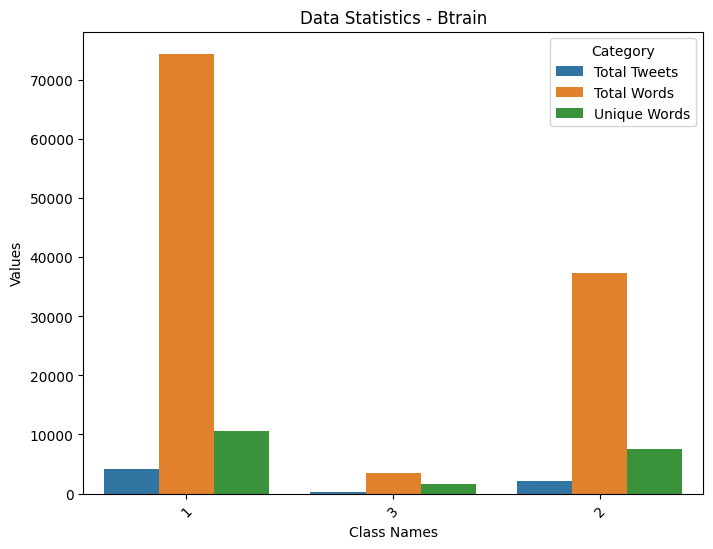

In [ ]:
Ctrain_data_matrix = pd.DataFrame({
    'Total Tweets': Ctrain_comments,
    'Total Words': Ctrain_words,
    'Unique Words': Ctrain_u_words,
    'Class Names': Ctrain_class_names
})

Ctrain_df = pd.melt(Ctrain_data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")

plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=Ctrain_df, x='Class Names', y='Values', hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics - Btrain')

ax.xaxis.set_ticklabels(Ctrain_class_names, rotation=45);

plt.show()

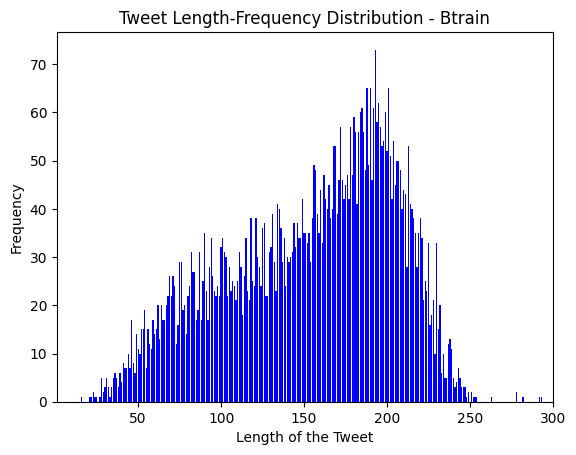

Maximum Length of a Tweet: 858
Minimum Length of a Tweet: 16
Average Length of a Tweet: 156.0


In [ ]:
Ctrain['Tweet_length'] = Ctrain.cleanText.apply(lambda x: len(x))
frequency = dict()

for i in Ctrain.Tweet_length:
    frequency[i] = frequency.get(i, 0) + 1

plt.bar(frequency.keys(), frequency.values(), color="b")
plt.xlim(1, 300)  # Adjust the xlim based on your data distribution
plt.xlabel('Length of the Tweet')
plt.ylabel('Frequency')
plt.title('Tweet Length-Frequency Distribution - Btrain')
plt.show()

print(f"Maximum Length of a Tweet: {max(Ctrain.Tweet_length)}")
print(f"Minimum Length of a Tweet: {min(Ctrain.Tweet_length)}")
print(f"Average Length of a Tweet: {round(np.mean(Ctrain.Tweet_length), 0)}")

In [ ]:
Ctrain.loc[Ctrain['Tweet_length'] > 256]['label'].value_counts()

1    27
3    14
Name: label, dtype: int64

In [ ]:

def data_summary(dataset):
    tweets = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleanText) for word in t.strip().split()]
    class_label = [k for k, v in dataset.label.value_counts().to_dict().items()]
    # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.label == label].cleanText) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
            counts[word] = counts.get(word, 0) + 1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key=lambda item: item[1], reverse=True)
        # Documents per class
        tweets.append(len(list(dataset[dataset.label == label].cleanText)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ", label)
        print("Number of tweets:{}".format(len(list(dataset[dataset.label == label].cleanText))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k, v in ordered[:10]:
            print("{}\t{}".format(k, v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return tweets, words, u_words, class_label

# Call the function for Bval
Cval_comments, Cval_words, Cval_u_words, Cval_class_names = data_summary(Cval)



Class Name :  1
Number of tweets:897
Number of Words:16365
Number of Unique Words:4226
Most Frequent Words:

fridaysforfuture	911
climate	451
climatestrike	235
strike	186
climatecrisis	176
peoplenotprofit	157
week	137
climateaction	131
gretathunberg	128
change	124

Class Name :  3
Number of tweets:511
Number of Words:8887
Number of Unique Words:3048
Most Frequent Words:

fridaysforfuture	520
climate	185
climatestrike	159
climatecrisis	121
climatechange	83
week	81
strike	78
climateaction	71
peoplenotprofit	71
change	68

Class Name :  2
Number of tweets:153
Number of Words:2177
Number of Unique Words:587
Most Frequent Words:

fridaysforfuture	153
climatestrike	112
climatecrisis	112
climatechange	109
extinctionrebellion	108
renewable	105
climateaction	105
thunberg	105
greta	104
fool	100
Total Number of Unique Words:5814


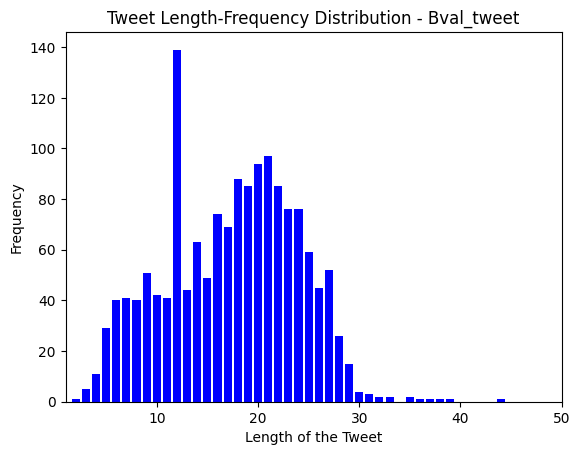

Maximum Length of a Tweet: 93
Minimum Length of a Tweet: 2
Average Length of a Tweet: 18.0


In [ ]:
# Assuming 'cleanText' contains the text in Bval_tweet
Cval['Tweet_length'] = Cval['cleanText'].apply(lambda x: len(x.split()))

frequency = dict()

for i in Cval['Tweet_length']:
    frequency[i] = frequency.get(i, 0) + 1

plt.bar(frequency.keys(), frequency.values(), color="b")
plt.xlim(1, 50)  # Adjust the xlim based on your data distribution
plt.xlabel('Length of the Tweet')
plt.ylabel('Frequency')
plt.title('Tweet Length-Frequency Distribution - Bval_tweet')
plt.show()

print(f"Maximum Length of a Tweet: {max(Cval['Tweet_length'])}")
print(f"Minimum Length of a Tweet: {min(Cval['Tweet_length'])}")
print(f"Average Length of a Tweet: {round(np.mean(Cval['Tweet_length']), 0)}")


In [ ]:
Ctest_summary = Ctest.filter(['cleanText'])

def data_summary(dataset):
    tweets = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleanText) for word in t.strip().split()]

    # find word list
    word_list = [word.strip().lower() for t in list(dataset.cleanText) for word in t.strip().split()]
    counts = dict()
    for word in word_list:
        counts[word] = counts.get(word, 0) + 1

    # sort the dictionary of the word list
    ordered = sorted(counts.items(), key=lambda item: item[1], reverse=True)

    # Total Word per dataset
    words.append(len(word_list))
    # Unique words per dataset
    u_words.append(len(np.unique(word_list)))

    print("\nDataset Summary")
    print("Total Number of Words:{}".format(len(word_list)))
    print("Number of Unique Words:{}".format(len(np.unique(word_list))))
    print("Most Frequent Words:\n")
    for k, v in ordered[:10]:
        print("{}\t{}".format(k, v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return words, u_words

# Call the function for Btest
Ctest_words, Ctest_u_words = data_summary(Ctest_summary)



Dataset Summary
Total Number of Words:26774
Number of Unique Words:5646
Most Frequent Words:

fridaysforfuture	1583
climate	624
climatestrike	484
climatecrisis	454
climateaction	320
climatechange	266
strike	249
week	239
peoplenotprofit	225
gretathunberg	194
Total Number of Unique Words:5646


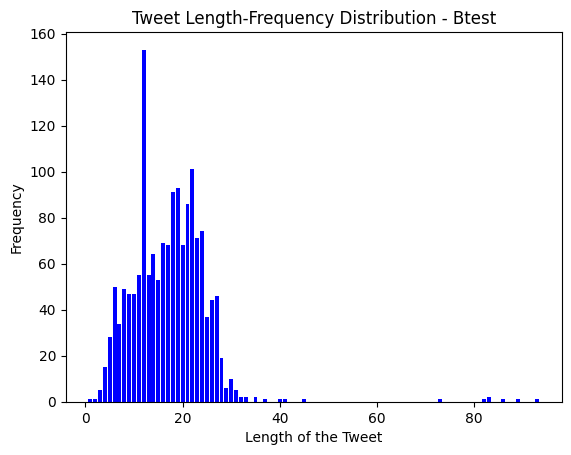

Maximum Length of a Tweet: 93
Minimum Length of a Tweet: 1
Average Length of a Tweet: 17.0


In [ ]:
# Assuming 'cleanText' contains the text in Btest
Ctest['Tweet_length'] = Ctest['cleanText'].apply(lambda x: len(x.split()))

frequency = dict()

for i in Ctest['Tweet_length']:
    frequency[i] = frequency.get(i, 0) + 1

plt.bar(frequency.keys(), frequency.values(), color="b")
plt.xlabel('Length of the Tweet')
plt.ylabel('Frequency')
plt.title('Tweet Length-Frequency Distribution - Btest')
plt.show()

print(f"Maximum Length of a Tweet: {max(Ctest['Tweet_length'])}")
print(f"Minimum Length of a Tweet: {min(Ctest['Tweet_length'])}")
print(f"Average Length of a Tweet: {round(np.mean(Ctest['Tweet_length']), 0)}")


# Converting tolist()

In [ ]:
Ctrain_over['enc_label'] = Ctrain_over['label'] - 1
Ctrain_over.enc_label.value_counts()

0    4105
2    4000
1    2000
Name: enc_label, dtype: int64

In [ ]:
Cval['enc_label'] = Cval['label'] - 1
Ctrain['enc_label'] = Ctrain['label'] - 1
Ctest['enc_label'] = Ctest['label'] - 1

print(Cval['enc_label'].unique())
print(Ctrain['enc_label'].unique())

[2 0 1]
[0 2 1]


In [ ]:
X_train = Ctrain['cleanText'].tolist()
y_train = Ctrain['enc_label'].tolist()

X_train_over = Ctrain_over['cleanText'].tolist()
y_train_over = Ctrain_over['enc_label'].tolist()

X_valid = Cval['cleanText'].tolist()
y_valid = Cval['enc_label'].tolist()
X_test = Ctest['cleanText'].tolist()
y_test = Ctest['enc_label'].tolist()

In [ ]:
Cval.shape

(1561, 5)

In [ ]:
print(set(y_train))
print(set(y_valid))
print(set(y_test))
print(set(y_train_over))

{0, 1, 2}
{0, 1, 2}
{0, 1, 2}
{0, 1, 2}


# Compute Class Weight

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
# cls = np.unique(train_data['Label'])
# print(cls)
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(Ctrain['enc_label']),
                                        y = Ctrain['enc_label']
                                    )

weight = {i : class_weights[i] for i in range(3)}
weight

{0: 0.5205034510759237, 1: 11.24561403508772, 2: 1.0102442868400314}

# ML Models

## TF-IDF

In [ ]:
#TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train_over)
X_val_tfidf = tfidf.transform(X_valid)
X_test_tfidf = tfidf.transform(X_test)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Example: Training individual models
model_rf = RandomForestClassifier(max_depth=10, n_estimators=100)  #use class_weight='balanced'
model_rf.fit(X_train_tfidf, y_train_over)

RandomForestClassifier(max_depth=10)

In [ ]:

y_pred = model_rf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)             #estimator 1000--> 0.58      0.57      0.57

Accuracy: 0.6037131882202305
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       921
           1       0.00      0.00      0.00       141
           2       0.87      0.05      0.10       500

    accuracy                           0.60      1562
   macro avg       0.49      0.35      0.28      1562
weighted avg       0.63      0.60      0.47      1562



### LR

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
model_lr = LogisticRegression( solver='liblinear', C=1)
model_lr.fit(X_train_tfidf, y_train_over)

LogisticRegression(C=1, solver='liblinear')

In [ ]:
# Predict on the test set
y_pred_lr = model_lr.predict(X_test_tfidf)

# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print('Classification Report for Logistic Regression:\n', classification_report_lr) # 0.63      0.63      0.63

Logistic Regression Accuracy: 0.6434058898847631
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.68      0.92      0.79       921
           1       0.00      0.00      0.00       141
           2       0.49      0.31      0.38       500

    accuracy                           0.64      1562
   macro avg       0.39      0.41      0.39      1562
weighted avg       0.56      0.64      0.58      1562



In [ ]:
y_pred = model_lr.predict(X_test_tfidf)

In [ ]:
'''import json
import zipfile

# Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# Replace y_pred with your actual predicted labels

# Create a DataFrame with "index" and "prediction" columns
submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# Sort the DataFrame based on the "index" column
submission_df = submission_df.sort_values(by="index")

# Define the path to save the submission file
submission_file_path = "/content/submission.json"

# Save the DataFrame to a JSON file
submission_df.to_json(submission_file_path, orient="records", lines=True)

# Zip the JSON file
with zipfile.ZipFile("submission.zip", "w") as zipf:
    zipf.write(submission_file_path, arcname="submission.json")

### MNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Multinomial Naive Bayes
model_nb = MultinomialNB(class_prior=None, fit_prior=True)
model_nb.fit(X_train_tfidf, y_train_over)

# Predict on the test set
y_pred_nb = model_nb.predict(X_test_tfidf)

# Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

print(f'Multinomial Naive Bayes Accuracy: {accuracy_nb}')
print('Classification Report for Multinomial Naive Bayes:\n', classification_report_nb)


Multinomial Naive Bayes Accuracy: 0.6248399487836107
Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       0.61      0.98      0.75       921
           1       0.00      0.00      0.00       141
           2       0.78      0.15      0.26       500

    accuracy                           0.62      1562
   macro avg       0.46      0.38      0.34      1562
weighted avg       0.61      0.62      0.53      1562



### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Support Vector Machine (SVM)
model_svm = SVC(C=1, kernel='linear')
model_svm.fit(X_train_tfidf, y_train_over)

# Predict on the test set
y_pred = model_svm.predict(X_test_tfidf)

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred)
classification_report_svm = classification_report(y_test, y_pred)

print(f'SVM Accuracy: {accuracy_svm}')
print('Classification Report for SVM:\n', classification_report_svm) # 0.65      0.65      0.65

SVM Accuracy: 0.6325224071702945
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.68      0.89      0.77       921
           1       0.00      0.00      0.00       141
           2       0.47      0.34      0.40       500

    accuracy                           0.63      1562
   macro avg       0.38      0.41      0.39      1562
weighted avg       0.55      0.63      0.58      1562



In [ ]:
y_pred = model_svm.predict(X_test_tfidf)

In [ ]:
'''import json
import zipfile

# Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# Replace y_pred with your actual predicted labels

# Create a DataFrame with "index" and "prediction" columns
submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# Sort the DataFrame based on the "index" column
submission_df = submission_df.sort_values(by="index")

# Define the path to save the submission file
submission_file_path = "/content/submission.json"

# Save the DataFrame to a JSON file
submission_df.to_json(submission_file_path, orient="records", lines=True)

# Zip the JSON file
with zipfile.ZipFile("submission.zip", "w") as zipf:
    zipf.write(submission_file_path, arcname="submission.json")

## Word2Vec(spacy)

In [ ]:
!python -m spacy download en_core_web_md

2024-01-15 16:23:35.607914: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 16:23:35.607963: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 16:23:35.609164: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 16:23:36.732968: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 18.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import spacy
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Load spaCy model
nlp = spacy.load("en_core_web_md")

# Tokenize and extract word vectors using spaCy
def spacy_word_vectors(text):
    doc = nlp(text)
    return doc.vector

# Apply spaCy word vectors extraction to the training set
X_train_spacy = [spacy_word_vectors(text) for text in X_trai_over]

# Apply spaCy word vectors extraction to the validation set
X_valid_spacy = [spacy_word_vectors(text) for text in X_valid]

# Apply spaCy word vectors extraction to the test set
X_test_spacy = [spacy_word_vectors(text) for text in X_test]

### SVM

In [ ]:
model_svm = SVC(C=1, class_weight='balanced', kernel='linear')
model_svm.fit(X_train_spacy, y_train_over)

# Predict on the validation set
#y_pred_valid = model_svm.predict(X_valid_spacy)

# Predict on the test set
y_pred = model_svm.predict(X_test_spacy)

# Evaluation on the validation set
accuracy_svm_valid = accuracy_score(y_test, y_pred)
classification_report_svm_valid = classification_report(y_test, y_pred)

print(f'SVM Accuracy on Validation Set: {accuracy_svm_valid}')
print('Classification Report for SVM on Validation Set:\n', classification_report_svm_valid)

SVM Accuracy on Validation Set: 0.588348271446863
Classification Report for SVM on Validation Set:
               precision    recall  f1-score   support

           0       0.77      0.58      0.66       921
           1       0.38      0.82      0.52       141
           2       0.48      0.54      0.51       500

    accuracy                           0.59      1562
   macro avg       0.54      0.65      0.56      1562
weighted avg       0.64      0.59      0.60      1562



### MNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_spacy)
scaled_val_embed = scaler.transform(X_valid_spacy)
scaled_test_embed = scaler.transform(X_test_spacy)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Multinomial Naive Bayes (MNB)
model_mnb = MultinomialNB()
model_mnb.fit(scaled_train_embed, y_train_over)

# Predict on the validation set
y_pred_valid_mnb = model_mnb.predict(scaled_val_embed)

# Predict on the test set
y_pred_test_mnb = model_mnb.predict(scaled_test_embed)

# Evaluation on the validation set
accuracy_mnb_valid = accuracy_score(y_test, y_pred_test_mnb)
classification_report_mnb_valid = classification_report(y_test, y_pred_test_mnb)

print(f'MNB Accuracy on Validation Set: {accuracy_mnb_valid}')
print('Classification Report for MNB on Validation Set:\n', classification_report_mnb_valid)

# You can use y_pred_test_mnb for predictions on the test set


MNB Accuracy on Validation Set: 0.5960307298335468
Classification Report for MNB on Validation Set:
               precision    recall  f1-score   support

           0       0.59      0.99      0.74       921
           1       0.00      0.00      0.00       141
           2       0.71      0.03      0.06       500

    accuracy                           0.60      1562
   macro avg       0.43      0.34      0.27      1562
weighted avg       0.58      0.60      0.46      1562



### LR

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression (LR)
model_lr = LogisticRegression(class_weight='balanced', max_iter=1000)
model_lr.fit(X_train_spacy, y_train_over)

# Predict on the validation set
y_pred_valid_lr = model_lr.predict(X_valid_spacy)

# Predict on the test set
y_pred_test_lr = model_lr.predict(X_test_spacy)

# Evaluation on the validation set
accuracy_lr_valid = accuracy_score(y_test, y_pred_test_lr)
classification_report_lr_valid = classification_report(y_test, y_pred_test_lr)

print(f'LR Accuracy on Validation Set: {accuracy_lr_valid}')
print('Classification Report for LR on Validation Set:\n', classification_report_lr_valid)

# You can use y_pred_test_lr for predictions on the test set

LR Accuracy on Validation Set: 0.5723431498079385
Classification Report for LR on Validation Set:
               precision    recall  f1-score   support

           0       0.77      0.54      0.63       921
           1       0.36      0.84      0.50       141
           2       0.48      0.56      0.52       500

    accuracy                           0.57      1562
   macro avg       0.54      0.65      0.55      1562
weighted avg       0.64      0.57      0.58      1562



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Example: Training individual models
model_rf = RandomForestClassifier(class_weight='balanced', n_estimators=1000)  #use class_weight='balanced'
model_rf.fit(X_train_spacy, y_train_over)

RandomForestClassifier(class_weight='balanced', n_estimators=1000)

In [ ]:

y_pred = model_rf.predict(X_test_spacy)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)             #estimator 1000--> 0.58      0.57      0.57

Accuracy: 0.6446862996158771
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.93      0.76       921
           1       0.96      0.39      0.56       141
           2       0.59      0.19      0.29       500

    accuracy                           0.64      1562
   macro avg       0.73      0.50      0.53      1562
weighted avg       0.65      0.64      0.59      1562



# Deep Learning


## Glove BiGRU


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model

In [ ]:
tokenizer = Tokenizer(num_words = 116000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)     #tokenization
tokenizer.fit_on_texts(Ctrain_over['cleanText'])
word_index = tokenizer.word_index
vocab_size = len(word_index)+1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Load GloVe embeddings
glove_file = '/content/drive/MyDrive/Colab Notebooks/CASE 2024/glove.twitter.27B.100d.txt'  # Specify the path to your GloVe file
word2vec_output_file = '/content/drive/MyDrive/Colab Notebooks/CASE 2024/glove.twitter.27B.100d.word2vec'
#glove2word2vec(glove_file, word2vec_output_file)
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)


In [ ]:
# Create an embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))  # Assuming GloVe embeddings are 300-dimensional
for word, i in tokenizer.word_index.items():
    if word in glove_model:
        embedding_matrix[i] = glove_model[word]

In [ ]:
print(vocab_size)

13989


In [ ]:
max_len = 256
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(X_train_over)
print(len(tokenizer.word_index))
train_pad_sequences =  pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(X_valid)
validation_pad_sequences =  pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

# Validation Sequences
test_sequences = tokenizer.texts_to_sequences(X_test)
test_pad_sequences =  pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of test Sequences :" ,test_pad_sequences.shape)

13988
Number of Training Sequences : (10105, 256)
Number of Validation Sequences : (1561, 256)
Number of test Sequences : (1562, 256)


In [ ]:
Cval['enc_label'] = Cval['label'] - 1
Ctrain_over['enc_label'] = Ctrain_over['label'] - 1
Ctest['enc_label'] = Ctest['label'] - 1
print(Cval['enc_label'].unique())
print(Ctrain_over['enc_label'].unique())

[2 0 1]
[0 2 1]


In [ ]:
num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath =  "OverTaskB_BiGRU_tf.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(GRU(units = 128,return_sequences=True,dropout = 0.2)))
# model.add(Conv1D(64, 3, activation='relu'))
# model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # Adjust for binary/multi-class classification

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 100)          1398900   
                                                                 
 bidirectional (Bidirection  (None, 256, 256)          176640    
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 128)               8388736   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Ctrain_over['enc_label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Cval['enc_label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/15
316/316 [==============================] - ETA: 0s - loss: 0.6330 - accuracy: 0.6840
Epoch 1: val_accuracy improved from -inf to 0.65535, saving model to OverTaskB_BiGRU_tf.h5
316/316 [==============================] - 61s 162ms/step - loss: 0.6330 - accuracy: 0.6840 - val_loss: 0.8655 - val_accuracy: 0.6553
Epoch 2/15
316/316 [==============================] - ETA: 0s - loss: 0.2289 - accuracy: 0.9108
Epoch 2: val_accuracy did not improve from 0.65535
316/316 [==============================] - 17s 52ms/step - loss: 0.2289 - accuracy: 0.9108 - val_loss: 1.0023 - val_accuracy: 0.6329
Epoch 3/15
316/316 [==============================] - ETA: 0s - loss: 0.1041 - accuracy: 0.9634
Epoch 3: val_accuracy did not improve from 0.65535
316/316 [==============================] - 17s 53ms/step - loss: 0.1041 - accuracy: 0.9634 - val_loss: 1.2891 - val_accuracy: 0.6464
Epoch 4/15
315/316 [============================>.] - ETA: 0s - loss: 0.0685 - accuracy: 0.9794
Epoch 4: val_accuracy d

In [ ]:
# Load the saved model
model = load_model(filepath)
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)

print("F1-Score:",f1_score(Cval['enc_label'],y_pred,average='macro')*100)
print("Accuracy:",accuracy_score(Cval['enc_label'],y_pred)*100)

49/49 [==============================] - 1s 11ms/step
F1-Score: 63.65863625587228
Accuracy: 65.5349135169763


In [ ]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
report = classification_report(Cval['enc_label'], y_pred)

#print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       897
           1       0.85      0.60      0.70       153
           2       0.52      0.42      0.47       511

    accuracy                           0.66      1561
   macro avg       0.69      0.61      0.64      1561
weighted avg       0.65      0.66      0.65      1561



In [ ]:
y_pred = np.argmax(model.predict(test_pad_sequences), axis=-1)
from sklearn.metrics import classification_report

#Show precision and recall per genre
report = classification_report(Ctest['enc_label'], y_pred)

#print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

49/49 [==============================] - 1s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       921
           1       0.93      0.65      0.76       141
           2       0.55      0.44      0.49       500

    accuracy                           0.68      1562
   macro avg       0.73      0.63      0.67      1562
weighted avg       0.68      0.68      0.67      1562



## Glove BiLSTM + CNN

In [ ]:
#folderpath = "/content/drive/MyDrive/Colab Notebooks/case/TaskB"

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath =  "Overglovebilstmcnn.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
# Build the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # Adjust for binary/multi-class classification

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 256, 100)          1398900   
                                                                 
 bidirectional_2 (Bidirecti  (None, 256, 128)          84480     
 onal)                                                           
                                                                 
 conv1d (Conv1D)             (None, 254, 64)           24640     
                                                                 
 max_pooling1d (MaxPooling1  (None, 84, 64)            0         
 D)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 5376)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_pad_sequences,
    Ctrain_over['enc_label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Cval['enc_label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/15
316/316 [==============================] - ETA: 0s - loss: 0.8242 - accuracy: 0.5793
Epoch 1: val_accuracy improved from -inf to 0.63677, saving model to Overglovebilstmcnn.h5
316/316 [==============================] - 16s 25ms/step - loss: 0.8242 - accuracy: 0.5793 - val_loss: 0.7746 - val_accuracy: 0.6368
Epoch 2/15
315/316 [============================>.] - ETA: 0s - loss: 0.5717 - accuracy: 0.7082
Epoch 2: val_accuracy did not improve from 0.63677
316/316 [==============================] - 7s 21ms/step - loss: 0.5715 - accuracy: 0.7082 - val_loss: 0.7945 - val_accuracy: 0.6304
Epoch 3/15
315/316 [============================>.] - ETA: 0s - loss: 0.4839 - accuracy: 0.7538
Epoch 3: val_accuracy did not improve from 0.63677
316/316 [==============================] - 6s 18ms/step - loss: 0.4842 - accuracy: 0.7536 - val_loss: 0.8510 - val_accuracy: 0.6336
Epoch 4/15
313/316 [============================>.] - ETA: 0s - loss: 0.4255 - accuracy: 0.7949
Epoch 4: val_accuracy impr

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Cval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


49/49 [==============================] - 1s 10ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.7034    0.7692    0.7348       897
           1     0.6871    0.6601    0.6733       153
           2     0.5289    0.4481    0.4852       511

    accuracy                         0.6534      1561
   macro avg     0.6398    0.6258    0.6311      1561
weighted avg     0.6446    0.6534    0.6471      1561



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Ctest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


49/49 [==============================] - 1s 13ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.6892    0.7416    0.7144       921
           1     0.7594    0.7163    0.7372       141
           2     0.4772    0.4180    0.4456       500

    accuracy                         0.6357      1562
   macro avg     0.6419    0.6253    0.6324      1562
weighted avg     0.6277    0.6357    0.6304      1562



## Glove BiLSTM

In [ ]:
num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath =  "Overglovebilstm.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
# Build the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
# model.add(Conv1D(64, 3, activation='relu'))
# model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # Adjust for binary/multi-class classification

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 256, 100)          1398900   
                                                                 
 bidirectional_3 (Bidirecti  (None, 256, 128)          84480     
 onal)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               4194432   
                                                                 
 dropout_41 (Dropout)        (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                      

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Ctrain_over['enc_label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Cval['enc_label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/15
316/316 [==============================] - ETA: 0s - loss: 0.7974 - accuracy: 0.5995
Epoch 1: val_accuracy improved from -inf to 0.64190, saving model to Overglovebilstm.h5
316/316 [==============================] - 22s 40ms/step - loss: 0.7974 - accuracy: 0.5995 - val_loss: 0.7808 - val_accuracy: 0.6419
Epoch 2/15
316/316 [==============================] - ETA: 0s - loss: 0.5365 - accuracy: 0.7304
Epoch 2: val_accuracy did not improve from 0.64190
316/316 [==============================] - 14s 46ms/step - loss: 0.5365 - accuracy: 0.7304 - val_loss: 0.8479 - val_accuracy: 0.6188
Epoch 3/15
315/316 [============================>.] - ETA: 0s - loss: 0.4226 - accuracy: 0.7987
Epoch 3: val_accuracy did not improve from 0.64190
316/316 [==============================] - 10s 31ms/step - loss: 0.4229 - accuracy: 0.7985 - val_loss: 0.9007 - val_accuracy: 0.6304
Epoch 4/15
315/316 [============================>.] - ETA: 0s - loss: 0.3356 - accuracy: 0.8481
Epoch 4: val_accuracy impro

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Cval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)

49/49 [==============================] - 1s 11ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.7055    0.7883    0.7446       921
           1     0.9000    0.7660    0.8276       141
           2     0.5400    0.4460    0.4885       500

    accuracy                         0.6767      1562
   macro avg     0.7152    0.6667    0.6869      1562
weighted avg     0.6701    0.6767    0.6701      1562



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Ctest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


49/49 [==============================] - 1s 11ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.6961    0.7815    0.7363       897
           1     0.8443    0.6732    0.7491       153
           2     0.5324    0.4501    0.4878       511

    accuracy                         0.6624      1561
   macro avg     0.6909    0.6349    0.6577      1561
weighted avg     0.6571    0.6624    0.6562      1561



## Glove CNN + BiGRU

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath =  "OverTaskBglovebigrucnn.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

# Model Architecture
input_layer = Input(shape=(max_len,), dtype=tf.int32)
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_layer)

# Convolutional Neural Network (CNN)
conv1 = Conv1D(128, 5, activation='relu')(embedding_layer)
max_pooling = MaxPooling1D(5)(conv1)

# Recurrent Neural Network (RNN)
bi_gru = Bidirectional(GRU(units=64, return_sequences=True, dropout=0.2))(max_pooling)

# Flatten and Dense Layers
flatten = Flatten()(bi_gru)
dense1 = Dense(128, activation='relu')(flatten)
dropout1 = Dropout(0.2)(dense1)
dense2 = Dense(64, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(dense2)

# Output Layer
output_layer = Dense(3, activation='softmax')(dropout2)

# Model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 256, 100)          1398900   
                                                                 
 conv1d_1 (Conv1D)           (None, 252, 128)          64128     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 50, 128)           0         
 g1D)                                                            
                                                                 
 bidirectional_4 (Bidirecti  (None, 50, 128)           74496     
 onal)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 6400)              0     

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Ctrain_over['enc_label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Cval['enc_label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/15
316/316 [==============================] - ETA: 0s - loss: 0.7960 - accuracy: 0.5811
Epoch 1: val_accuracy improved from -inf to 0.62332, saving model to OverTaskBglovebigrucnn.h5
316/316 [==============================] - 9s 13ms/step - loss: 0.7960 - accuracy: 0.5811 - val_loss: 0.7861 - val_accuracy: 0.6233
Epoch 2/15
316/316 [==============================] - ETA: 0s - loss: 0.5350 - accuracy: 0.7257
Epoch 2: val_accuracy improved from 0.62332 to 0.66240, saving model to OverTaskBglovebigrucnn.h5
316/316 [==============================] - 4s 12ms/step - loss: 0.5350 - accuracy: 0.7257 - val_loss: 0.8127 - val_accuracy: 0.6624
Epoch 3/15
310/316 [============================>.] - ETA: 0s - loss: 0.4500 - accuracy: 0.7871
Epoch 3: val_accuracy did not improve from 0.66240
316/316 [==============================] - 3s 9ms/step - loss: 0.4508 - accuracy: 0.7864 - val_loss: 0.8183 - val_accuracy: 0.6374
Epoch 4/15
310/316 [============================>.] - ETA: 0s - loss: 0.3

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Cval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


49/49 [==============================] - 2s 5ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.6874    0.8484    0.7595       897
           1     0.8772    0.6536    0.7491       153
           2     0.5824    0.3875    0.4653       511

    accuracy                         0.6784      1561
   macro avg     0.7157    0.6298    0.6580      1561
weighted avg     0.6716    0.6784    0.6622      1561



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Ctest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


49/49 [==============================] - 1s 12ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.6894    0.8436    0.7588       921
           1     0.9369    0.7376    0.8254       141
           2     0.5432    0.3520    0.4272       500

    accuracy                         0.6767      1562
   macro avg     0.7232    0.6444    0.6705      1562
weighted avg     0.6650    0.6767    0.6587      1562



## FastText

In [ ]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ml.300.vec.gz'))

In [ ]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ml.300.vec.gz'))

In [ ]:
vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
  values = line.split()
  word = values [0].decode('utf-8')
  vector = np.asarray(values[1:], dtype='float32')
  vocab_and_vectors[word] = vector

In [ ]:
embedding_matrixx = np.zeros((vocab_size, 300))
for word, i in word_index.items():
  embedding_vector = vocab_and_vectors.get(word)
  # words that cannot be found will be set to 0
  if embedding_vector is not None:
    embedding_matrixx[i] = embedding_vector

## FastText CNN + BiLSTM

In [ ]:
num_classes = 3

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "OverTaskBfasttext_CNNBiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrixx],trainable=False, input_length = max_len),
tf.keras.layers.Conv1D(128, 3, activation='relu'),
tf.keras.layers.MaxPooling1D(3),
tf.keras.layers.Bidirectional(LSTM(units = 256,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(3, activation='softmax')])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 256, 300)          4196700   
                                                                 
 conv1d_2 (Conv1D)           (None, 254, 128)          115328    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 84, 128)           0         
 g1D)                                                            
                                                                 
 bidirectional_5 (Bidirecti  (None, 84, 512)           788480    
 onal)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 43008)             0         
                                                                 
 dense_9 (Dense)             (None, 3)                

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Ctrain_over['enc_label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Cval['enc_label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/15
316/316 [==============================] - ETA: 0s - loss: 0.8172 - accuracy: 0.5817
Epoch 1: val_accuracy improved from -inf to 0.60730, saving model to OverTaskBfasttext_CNNBiLSTMModel.h5
316/316 [==============================] - 10s 18ms/step - loss: 0.8172 - accuracy: 0.5817 - val_loss: 0.8656 - val_accuracy: 0.6073
Epoch 2/15
313/316 [============================>.] - ETA: 0s - loss: 0.5355 - accuracy: 0.7321
Epoch 2: val_accuracy did not improve from 0.60730
316/316 [==============================] - 4s 14ms/step - loss: 0.5351 - accuracy: 0.7324 - val_loss: 0.8621 - val_accuracy: 0.5958
Epoch 3/15
314/316 [============================>.] - ETA: 0s - loss: 0.4485 - accuracy: 0.7900
Epoch 3: val_accuracy improved from 0.60730 to 0.64510, saving model to OverTaskBfasttext_CNNBiLSTMModel.h5
316/316 [==============================] - 4s 14ms/step - loss: 0.4486 - accuracy: 0.7900 - val_loss: 0.8065 - val_accuracy: 0.6451
Epoch 4/15
315/316 [============================>.]

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Cval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


49/49 [==============================] - 1s 8ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.6801    0.8105    0.7396       897
           1     0.8254    0.6797    0.7455       153
           2     0.5137    0.3679    0.4287       511

    accuracy                         0.6528      1561
   macro avg     0.6730    0.6194    0.6379      1561
weighted avg     0.6398    0.6528    0.6384      1561



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Ctest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


49/49 [==============================] - 1s 6ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.6939    0.8219    0.7525       921
           1     0.8468    0.7447    0.7925       141
           2     0.5303    0.3680    0.4345       500

    accuracy                         0.6697      1562
   macro avg     0.6903    0.6449    0.6598      1562
weighted avg     0.6553    0.6697    0.6543      1562



## FastText CNN + BiGRU

In [ ]:
num_classes = 3

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "OverTaskBfasttext_CNNBiGRU.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

# Model Architecture
input_layer = Input(shape=(max_len,), dtype=tf.int32)
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrixx], input_length=max_len, trainable=False)(input_layer)

# Convolutional Neural Network (CNN)
conv1 = Conv1D(128, 5, activation='relu')(embedding_layer)
max_pooling = MaxPooling1D(5)(conv1)

# Recurrent Neural Network (RNN)
bi_gru = Bidirectional(GRU(units=64, return_sequences=True, dropout=0.2))(max_pooling)

# Flatten and Dense Layers
flatten = Flatten()(bi_gru)
dense1 = Dense(128, activation='relu')(flatten)
# dropout1 = Dropout(0.2)(dense1)
dense2 = Dense(64, activation='relu')(dense1)
# dropout2 = Dropout(0.2)(dense2)

# Output Layer
output_layer = Dense(3, activation='softmax')(dense2)

# Model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_6 (Embedding)     (None, 256, 300)          4196700   
                                                                 
 conv1d_3 (Conv1D)           (None, 252, 128)          192128    
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 50, 128)           0         
 g1D)                                                            
                                                                 
 bidirectional_6 (Bidirecti  (None, 50, 128)           74496     
 onal)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 6400)              0   

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_pad_sequences,
    Ctrain_over['enc_label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Cval['enc_label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/15
316/316 [==============================] - ETA: 0s - loss: 0.7506 - accuracy: 0.6021
Epoch 1: val_accuracy improved from -inf to 0.60154, saving model to OverTaskBfasttext_CNNBiGRU.h5
316/316 [==============================] - 10s 13ms/step - loss: 0.7506 - accuracy: 0.6021 - val_loss: 0.8736 - val_accuracy: 0.6015
Epoch 2/15
311/316 [============================>.] - ETA: 0s - loss: 0.5024 - accuracy: 0.7559
Epoch 2: val_accuracy did not improve from 0.60154
316/316 [==============================] - 3s 9ms/step - loss: 0.5031 - accuracy: 0.7560 - val_loss: 0.8997 - val_accuracy: 0.5900
Epoch 3/15
316/316 [==============================] - ETA: 0s - loss: 0.4030 - accuracy: 0.8191
Epoch 3: val_accuracy improved from 0.60154 to 0.66560, saving model to OverTaskBfasttext_CNNBiGRU.h5
316/316 [==============================] - 3s 11ms/step - loss: 0.4030 - accuracy: 0.8191 - val_loss: 0.9194 - val_accuracy: 0.6656
Epoch 4/15
311/316 [============================>.] - ETA: 0s - 

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Cval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


49/49 [==============================] - 1s 3ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.7030    0.7915    0.7446       897
           1     0.7704    0.6797    0.7222       153
           2     0.5409    0.4403    0.4854       511

    accuracy                         0.6656      1561
   macro avg     0.6714    0.6372    0.6508      1561
weighted avg     0.6565    0.6656    0.6576      1561



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Ctest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


49/49 [==============================] - 1s 7ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.7153    0.7666    0.7400       921
           1     0.7517    0.7730    0.7622       141
           2     0.5209    0.4480    0.4817       500

    accuracy                         0.6652      1562
   macro avg     0.6627    0.6625    0.6613      1562
weighted avg     0.6564    0.6652    0.6594      1562



## FastText BiGRU

In [ ]:
num_classes = 3

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "OverTaskBfasttext_BiGRUModel_FastText.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrixx],trainable=False, input_length = max_len),
# tf.keras.layers.Conv1D(128, 2, activation='relu'),
# tf.keras.layers.MaxPooling1D(2),
tf.keras.layers.Bidirectional(GRU(units = 256,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(3, activation='softmax')])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 256, 300)          4196700   
                                                                 
 bidirectional_7 (Bidirecti  (None, 256, 512)          857088    
 onal)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 131072)            0         
                                                                 
 dense_13 (Dense)            (None, 3)                 393219    
                                                                 
Total params: 5447007 (20.78 MB)
Trainable params: 1250307 (4.77 MB)
Non-trainable params: 4196700 (16.01 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Ctrain_over['enc_label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Cval['enc_label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/15
316/316 [==============================] - ETA: 0s - loss: 0.8468 - accuracy: 0.5751
Epoch 1: val_accuracy improved from -inf to 0.55285, saving model to OverTaskBfasttext_BiGRUModel_FastText.h5
316/316 [==============================] - 17s 38ms/step - loss: 0.8468 - accuracy: 0.5751 - val_loss: 0.8799 - val_accuracy: 0.5529
Epoch 2/15
315/316 [============================>.] - ETA: 0s - loss: 0.5986 - accuracy: 0.7144
Epoch 2: val_accuracy improved from 0.55285 to 0.57976, saving model to OverTaskBfasttext_BiGRUModel_FastText.h5
316/316 [==============================] - 10s 33ms/step - loss: 0.5986 - accuracy: 0.7146 - val_loss: 0.8970 - val_accuracy: 0.5798
Epoch 3/15
315/316 [============================>.] - ETA: 0s - loss: 0.4986 - accuracy: 0.7732
Epoch 3: val_accuracy improved from 0.57976 to 0.60282, saving model to OverTaskBfasttext_BiGRUModel_FastText.h5
316/316 [==============================] - 10s 33ms/step - loss: 0.4986 - accuracy: 0.7731 - val_loss: 0.9322 

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Cval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


49/49 [==============================] - 2s 15ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.6813    0.7770    0.7260       897
           1     0.6732    0.6732    0.6732       153
           2     0.4883    0.3679    0.4196       511

    accuracy                         0.6329      1561
   macro avg     0.6143    0.6060    0.6063      1561
weighted avg     0.6173    0.6329    0.6206      1561



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Ctest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


49/49 [==============================] - 1s 12ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.6856    0.7742    0.7272       921
           1     0.7762    0.7872    0.7817       141
           2     0.4670    0.3540    0.4027       500

    accuracy                         0.6408      1562
   macro avg     0.6429    0.6385    0.6372      1562
weighted avg     0.6238    0.6408    0.6282      1562



## FastText BiLSTM

In [ ]:
num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "OverFastTextglovebilstm.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
# Build the model
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrixx],trainable=False, input_length = max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
# model.add(Conv1D(64, 3, activation='relu'))
# model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # Adjust for binary/multi-class classification

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 256, 300)          4196700   
                                                                 
 bidirectional_8 (Bidirecti  (None, 256, 128)          186880    
 onal)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 32768)             0         
                                                                 
 dense_14 (Dense)            (None, 128)               4194432   
                                                                 
 dropout_44 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 3)                 387       
                                                      

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    Ctrain_over['enc_label'],
    epochs=15,
    batch_size=32,
    validation_data=(validation_pad_sequences, Cval['enc_label']),
    verbose=1,
    callbacks=callback_list
)

Epoch 1/15
315/316 [============================>.] - ETA: 0s - loss: 0.8638 - accuracy: 0.5606
Epoch 1: val_accuracy improved from -inf to 0.59193, saving model to OverFastTextglovebilstm.h5
316/316 [==============================] - 11s 22ms/step - loss: 0.8631 - accuracy: 0.5610 - val_loss: 0.8846 - val_accuracy: 0.5919
Epoch 2/15
316/316 [==============================] - ETA: 0s - loss: 0.6188 - accuracy: 0.6942
Epoch 2: val_accuracy improved from 0.59193 to 0.60090, saving model to OverFastTextglovebilstm.h5
316/316 [==============================] - 7s 23ms/step - loss: 0.6188 - accuracy: 0.6942 - val_loss: 0.9033 - val_accuracy: 0.6009
Epoch 3/15
316/316 [==============================] - ETA: 0s - loss: 0.5062 - accuracy: 0.7504
Epoch 3: val_accuracy did not improve from 0.60090
316/316 [==============================] - 6s 19ms/step - loss: 0.5062 - accuracy: 0.7504 - val_loss: 0.9990 - val_accuracy: 0.5836
Epoch 4/15
315/316 [============================>.] - ETA: 0s - loss:

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(validation_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Cval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


49/49 [==============================] - 1s 10ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.7006    0.7280    0.7141       897
           1     0.7155    0.5425    0.6171       153
           2     0.4834    0.4853    0.4844       511

    accuracy                         0.6304      1561
   macro avg     0.6332    0.5853    0.6052      1561
weighted avg     0.6310    0.6304    0.6294      1561



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report_loaded_model = classification_report(Ctest['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


49/49 [==============================] - 1s 7ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.7222    0.7340    0.7281       921
           1     0.8173    0.6028    0.6939       141
           2     0.4789    0.5000    0.4892       500

    accuracy                         0.6472      1562
   macro avg     0.6728    0.6123    0.6371      1562
weighted avg     0.6529    0.6472    0.6485      1562



# ktrain

In [ ]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 48.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 48.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 44.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.39.0-py3-none-any.whl size=25319737 sha256=198b5c6d8a507c4ac060de9d9efe1068184a42cf1cbb390a00136c5414228884
  Stored in directory: /root/.cache/pip/wheels/98/fd/0a/ef6252223f3d2

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
import ktrain
from ktrain import text

In [ ]:
categories=['0', '1', '2']

## Ktrain Climate BERT

In [ ]:
model_name = 'climatebert/distilroberta-base-climate-f'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)

config.json:   0%|          | 0.00/752 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

In [ ]:
train = trans.preprocess_train(X_train_over, y_train_over)
valid = trans.preprocess_train(X_valid, y_valid)
test = trans.preprocess_train(X_test,y_test)
model = trans.get_classifier()
ClimateBertlearner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=16)

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 28
	99percentile : 32


tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.15M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/4.98k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 27
	99percentile : 32


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 17
	95percentile : 27
	99percentile : 32


Is Multi-Label? False


simulating training for different learning rates... this may take a few moments...
Epoch 1/10
681/681 [==============================] - 596s 838ms/step - loss: 0.6773 - accuracy: 0.5742
Epoch 2/10
681/681 [==============================] - 583s 856ms/step - loss: 0.5090 - accuracy: 0.7507
Epoch 3/10
681/681 [==============================] - 582s 855ms/step - loss: 0.3030 - accuracy: 0.8731
Epoch 4/10
681/681 [==============================] - 580s 852ms/step - loss: 0.2568 - accuracy: 0.9016
Epoch 5/10
681/681 [==============================] - 580s 852ms/step - loss: 0.6686 - accuracy: 0.5585
Epoch 6/10
681/681 [==============================] - 580s 852ms/step - loss: 0.7644 - accuracy: 0.5165
Epoch 7/10
681/681 [==============================] - 121s 177ms/step - loss: 0.9371 - accuracy: 0.5103


done.
Visually inspect loss plot and select learning rate associated with falling loss


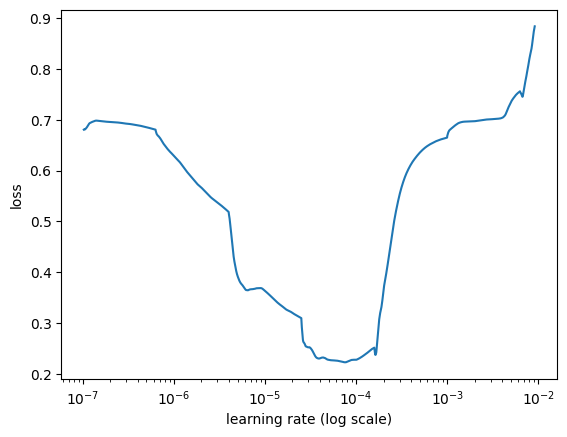

In [ ]:
ClimateBertlearner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
ClimateBertlearner.fit_onecycle(3e-5,10)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/10
632/632 [==============================] - 322s 464ms/step - loss: 0.9212 - accuracy: 0.5286 - val_loss: 0.7351 - val_accuracy: 0.6639
Epoch 2/10
632/632 [==============================] - 287s 455ms/step - loss: 0.6395 - accuracy: 0.6960 - val_loss: 0.6561 - val_accuracy: 0.6972
Epoch 3/10
632/632 [==============================] - 289s 457ms/step - loss: 0.4994 - accuracy: 0.7631 - val_loss: 0.7310 - val_accuracy: 0.6786
Epoch 4/10
632/632 [==============================] - 294s 465ms/step - loss: 0.4168 - accuracy: 0.8123 - val_loss: 0.7129 - val_accuracy: 0.7004
Epoch 5/10
632/632 [==============================] - 287s 454ms/step - loss: 0.3326 - accuracy: 0.8563 - val_loss: 0.8074 - val_accuracy: 0.6780
Epoch 6/10
632/632 [==============================] - 294s 466ms/step - loss: 0.2397 - accuracy: 0.9037 - val_loss: 1.0339 - val_accuracy: 0.6517
Epoch 7/10
632/632 [==============================] - 287s 45

In [ ]:
ClimateBertlearner.validate(class_names=categories)

49/49 [==============================] - 15s 274ms/step
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       921
           1       0.88      0.70      0.78       141
           2       0.52      0.53      0.52       500

    accuracy                           0.68      1562
   macro avg       0.71      0.66      0.68      1562
weighted avg       0.68      0.68      0.68      1562



array([[691,   6, 224],
       [ 17,  99,  25],
       [228,   7, 265]])

In [ ]:
'''import json
import zipfile

# Assuming Atest is your DataFrame with an "index" column and y_pred is your predicted labels
# Replace y_pred with your actual predicted labels

# Create a DataFrame with "index" and "prediction" columns
submission_df = pd.DataFrame({"index": Atest["index"].tolist(), "prediction": y_pred})

# Sort the DataFrame based on the "index" column
submission_df = submission_df.sort_values(by="index")

# Define the path to save the submission file
submission_file_path = "submission.json"

# Save the DataFrame to a JSON file
submission_df.to_json(submission_file_path, orient="records", lines=True)

# Zip the JSON file
with zipfile.ZipFile("ref.zip", "w") as zipf:
    zipf.write(submission_file_path, arcname="submission.json")'''


## Ktrain mBert

In [ ]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

In [ ]:
train = trans.preprocess_train(X_train_over, y_train_over)
valid = trans.preprocess_train(X_valid, y_valid)
test = trans.preprocess_train(X_test, y_test)

model = trans.get_classifier()
CasedmBertlearner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=16)

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 27
	99percentile : 31


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 27
	99percentile : 31


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 17
	95percentile : 27
	99percentile : 32


Is Multi-Label? False


In [ ]:
CasedmBertlearner.fit_onecycle(3e-5,15, class_weight = weight)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/15
632/632 [==============================] - 627s 939ms/step - loss: 1.3504 - accuracy: 0.3315 - val_loss: 0.9984 - val_accuracy: 0.3818
Epoch 2/15
632/632 [==============================] - 575s 909ms/step - loss: 0.7606 - accuracy: 0.5511 - val_loss: 0.9859 - val_accuracy: 0.4907
Epoch 3/15
632/632 [==============================] - 575s 909ms/step - loss: 0.5264 - accuracy: 0.6347 - val_loss: 0.9368 - val_accuracy: 0.5388
Epoch 4/15
632/632 [==============================] - 574s 909ms/step - loss: 0.5141 - accuracy: 0.6597 - val_loss: 0.9907 - val_accuracy: 0.5106
Epoch 5/15
632/632 [==============================] - 574s 909ms/step - loss: 0.4863 - accuracy: 0.6975 - val_loss: 0.8270 - val_accuracy: 0.6355
Epoch 6/15
632/632 [==============================] - 575s 910ms/step - loss: 0.3922 - accuracy: 0.7460 - val_loss: 0.8508 - val_accuracy: 0.6086
Epoch 7/15
632/632 [==============================] - 587s 92

In [ ]:
#CasedmBertlearner.fit_onecycle(3e-5, 15, class_weight = weight)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/2
13/13 [==============================] - 14s 1s/step - loss: 0.1671 - accuracy: 0.9645 - val_loss: 0.3714 - val_accuracy: 0.9067
Epoch 2/2
13/13 [==============================] - 16s 1s/step - loss: 0.1179 - accuracy: 0.9746 - val_loss: 0.4195 - val_accuracy: 0.8867


In [ ]:
CasedmBertlearner.validate(class_names=categories)

49/49 [==============================] - 32s 594ms/step
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       897
           1       0.86      0.70      0.77       153
           2       0.50      0.50      0.50       511

    accuracy                           0.65      1561
   macro avg       0.69      0.64      0.66      1561
weighted avg       0.65      0.65      0.65      1561



array([[646,   8, 243],
       [ 30, 107,  16],
       [244,   9, 258]])

In [ ]:
predictor = ktrain.get_predictor(Distillearner.model, preproc=trans)
y_pred = predictor.predict(X_test)
accuracy_mbert = accuracy_score(y_test, y_pred)
classification_report_mbert = classification_report(y_test, y_pred)

print(f'mBERT Accuracy: {accuracy_mbert}')
print('Classification Report for mBERT:\n', classification_report_mbert) # 0.63      0.63      0.63

Logistic Regression Accuracy: 0.86
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           1       0.97      0.92      0.94       121
           2       0.65      0.65      0.65        23
           3       0.25      0.50      0.33         6

    accuracy                           0.86       150
   macro avg       0.62      0.69      0.64       150
weighted avg       0.89      0.86      0.87       150



## Ktrain DistilmBert

In [ ]:
model_name = 'distilbert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)
train = trans.preprocess_train(X_train, y_train)
valid = trans.preprocess_train(X_valid, y_valid)
test = trans.preprocess_train(X_test, y_test)

model = trans.get_classifier()
Distillearner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=16)

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 27
	99percentile : 31


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 27
	99percentile : 31


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 17
	95percentile : 27
	99percentile : 32


Is Multi-Label? False


In [ ]:
Distillearner.fit_onecycle(3e-5,10, class_weight = weight)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/10
405/405 [==============================] - 224s 491ms/step - loss: 1.0180 - accuracy: 0.5026 - val_loss: 0.9154 - val_accuracy: 0.5262
Epoch 2/10
405/405 [==============================] - 196s 483ms/step - loss: 0.8651 - accuracy: 0.5562 - val_loss: 0.8543 - val_accuracy: 0.5807
Epoch 3/10
405/405 [==============================] - 196s 484ms/step - loss: 0.6951 - accuracy: 0.6384 - val_loss: 0.7013 - val_accuracy: 0.6729
Epoch 4/10
405/405 [==============================] - 196s 484ms/step - loss: 0.5380 - accuracy: 0.7003 - val_loss: 0.7672 - val_accuracy: 0.6165
Epoch 5/10
405/405 [==============================] - 202s 500ms/step - loss: 0.4471 - accuracy: 0.7369 - val_loss: 0.7846 - val_accuracy: 0.6402
Epoch 6/10
405/405 [==============================] - 196s 483ms/step - loss: 0.3630 - accuracy: 0.7823 - val_loss: 0.8028 - val_accuracy: 0.6050
Epoch 7/10
405/405 [==============================] - 196s 48

In [ ]:
Distillearner.validate(class_names=categories)

49/49 [==============================] - 16s 284ms/step
              precision    recall  f1-score   support

           0       0.73      0.70      0.72       921
           1       0.80      0.80      0.80       141
           2       0.49      0.53      0.51       500

    accuracy                           0.65      1562
   macro avg       0.67      0.68      0.67      1562
weighted avg       0.66      0.65      0.66      1562



array([[644,  11, 266],
       [ 19, 113,   9],
       [217,  18, 265]])

In [ ]:
# import json
# import zipfile

# # Assuming Btest is your DataFrame with an "index" column and y_pred is your predicted labels
# # Replace y_pred with your actual predicted labels

# # Create a DataFrame with "index" and "prediction" columns
# submission_df = pd.DataFrame({"index": Btest["index"].tolist(), "prediction": y_pred})

# # Sort the DataFrame based on the "index" column
# submission_df = submission_df.sort_values(by="index")

# # Define the path to save the submission file
# submission_file_path = "/content/submissiondistil.json"

# # Save the DataFrame to a JSON file
# submission_df.to_json(submission_file_path, orient="records", lines=True)

# # Zip the JSON file
# with zipfile.ZipFile("distilmBERTTaskB.zip", "w") as zipf:
#     zipf.write(submission_file_path, arcname="submissiondistil.json")

## Ktrain XLMR

In [ ]:
model_name = 'xlm-roberta-base'
trans = text.Transformer(model_name,maxlen=256,class_names=categories)
train = trans.preprocess_train(X_train_over, y_train_over)
valid = trans.preprocess_train(X_valid, y_valid)
test = trans.preprocess_train(X_test, y_test)

model = trans.get_classifier()
XLlearner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=8)

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 28
	99percentile : 32


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 27
	99percentile : 32


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 17
	95percentile : 27
	99percentile : 32


Is Multi-Label? False


In [ ]:
XLlearner.fit_onecycle(2e-5,7, class_weight = weight)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/7
802/802 [==============================] - 485s 575ms/step - loss: 1.1091 - accuracy: 0.2215 - val_loss: 1.1269 - val_accuracy: 0.0903
Epoch 2/7
802/802 [==============================] - 456s 568ms/step - loss: 1.0994 - accuracy: 0.3373 - val_loss: 1.0733 - val_accuracy: 0.4430
Epoch 3/7
802/802 [==============================] - 455s 568ms/step - loss: 1.1030 - accuracy: 0.3880 - val_loss: 1.0533 - val_accuracy: 0.3201
Epoch 4/7
802/802 [==============================] - 455s 567ms/step - loss: 1.1055 - accuracy: 0.2449 - val_loss: 1.1032 - val_accuracy: 0.3201
Epoch 5/7
802/802 [==============================] - 456s 568ms/step - loss: 1.1053 - accuracy: 0.3153 - val_loss: 1.1817 - val_accuracy: 0.0903
Epoch 6/7
802/802 [==============================] - 459s 573ms/step - loss: 1.1029 - accuracy: 0.2936 - val_loss: 1.0843 - val_accuracy: 0.5896
Epoch 7/7
802/802 [==============================] - ETA: 0s - loss

In [ ]:
XLlearner.validate(class_names=categories)

49/49 [==============================] - 28s 575ms/step
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       921
           1       0.00      0.00      0.00       141
           2       0.00      0.00      0.00       500

    accuracy                           0.59      1562
   macro avg       0.20      0.33      0.25      1562
weighted avg       0.35      0.59      0.44      1562



array([[921,   0,   0],
       [141,   0,   0],
       [500,   0,   0]])

In [ ]:
predictor = ktrain.get_predictor(XLlearner.model, preproc=trans)
y_pred = predictor.predict(X_test)
accuracy_XLMR = accuracy_score(y_test, y_pred)
classification_report_XLMR = classification_report(y_test, y_pred)

print(f'XLMR Accuracy: {accuracy_XLMR}')
print('Classification Report for XLMR:\n', classification_report_XLMR)

XLMR Accuracy: 0.8533333333333334
Classification Report for XLMR:
               precision    recall  f1-score   support

           1       0.93      0.93      0.93       121
           2       0.76      0.57      0.65        23
           3       0.23      0.50      0.32         6

    accuracy                           0.85       150
   macro avg       0.64      0.66      0.63       150
weighted avg       0.88      0.85      0.86       150



# Hybrid Model

## Dependencies

In [ ]:
!pip install pytorch_pretrained_bert
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 24.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Reshape, Bidirectional, LSTM, GlobalAveragePooling1D, GlobalMaxPooling1D, Dense, Dropout, Input, concatenate
from tensorflow.keras.models import Model

In [ ]:
#Ctrain['enc_label'] = Ctrain['label'] - 1

In [ ]:
#y_train = Ctrain['enc_label'].tolist()

In [ ]:
#set(y_train)

## mBert + BiLSTM + CNN

In [ ]:
bert_preprocess2 = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3")
bert_encoder2 = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4")

In [ ]:
#BERT Layers
text_input = Input(shape=(), dtype=tf.string, name='cleanText')
preprocessed_text2 = bert_preprocess2(text_input)
outputs2 = bert_encoder2(preprocessed_text2)

In [ ]:

# BERT embeddings
bert_embedding = outputs2['pooled_output']  # or 'sequence_output' based on your use case
bert_embedding = Dropout(0.2)(bert_embedding)

# Reshape BERT embeddings to a 3D tensor
bert_embedding = Reshape((-1, 768))(bert_embedding)  # Replace 768 with the actual hidden size

# Bidirectional LSTM layer
lstm_output = Bidirectional(LSTM(64, return_sequences=True))(bert_embedding)

# Pooling layers
avg_pooling = GlobalAveragePooling1D()(lstm_output)
max_pooling = GlobalMaxPooling1D()(lstm_output)

# Concatenate and additional dense layers
concat_output = concatenate([avg_pooling, max_pooling])
dense_layer = Dense(128, activation='relu')(concat_output)
dense_layer = Dropout(0.2)(dense_layer)

# Additional Dense layer
dense_layer_2 = Dense(64, activation='relu')(dense_layer)
dense_layer_2 = Dropout(0.2)(dense_layer_2)

# Output layer
output_layer = Dense(3, activation='softmax')(dense_layer_2)

# Connect the input and output layers to create the model
model2 = Model(inputs=text_input, outputs=output_layer)


In [ ]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 cleanText (InputLayer)      [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_mask': (None, 128)   0         ['cleanText[0][0]']           
                             , 'input_word_ids': (None,                                           
                              128),                                                               
                              'input_type_ids': (None,                                            
                             128)}                                                                
                                                                                              

In [ ]:
num_classes = 3            #### change class number

accuracy_threshold = 0.99

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath =  "hybrid1.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
# from tensorflow.keras.optimizers import AdamW
# METRICS = [
#       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
#       tf.keras.metrics.Precision(name='precision'),
#       tf.keras.metrics.Recall(name='recall')
# ]

# model2.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=METRICS)
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2.fit(X_train_over, y_train_over, epochs=10)

Epoch 1/10
316/316 [==============================] - 126s 342ms/step - loss: 1.0487 - accuracy: 0.4133
Epoch 2/10
316/316 [==============================] - 108s 342ms/step - loss: 1.0138 - accuracy: 0.4444
Epoch 3/10
316/316 [==============================] - 108s 342ms/step - loss: 0.9863 - accuracy: 0.4746
Epoch 4/10
316/316 [==============================] - 108s 341ms/step - loss: 0.9715 - accuracy: 0.4866
Epoch 5/10
316/316 [==============================] - 108s 342ms/step - loss: 0.9523 - accuracy: 0.5075
Epoch 6/10
316/316 [==============================] - 107s 340ms/step - loss: 0.9302 - accuracy: 0.5202
Epoch 7/10
316/316 [==============================] - 107s 339ms/step - loss: 0.9142 - accuracy: 0.5205
Epoch 8/10
316/316 [==============================] - 107s 340ms/step - loss: 0.8992 - accuracy: 0.5335
Epoch 9/10
316/316 [==============================] - 108s 340ms/step - loss: 0.8864 - accuracy: 0.5420
Epoch 10/10
316/316 [==============================] - 108s 342m

In [ ]:
#model2.fit(X_train, y_train, epochs=100, validation_data = (X_valid, y_valid), verbose = 1, callbacks = callback_list)

In [ ]:
model2.evaluate(X_valid, y_valid)

49/49 [==============================] - 18s 336ms/step - loss: 0.7971 - accuracy: 0.5945


[0.7970960140228271, 0.5944907069206238]

In [ ]:
#y_pred = np.argmax(model2.predict(X_test), axis=-1)

##print("F1-Score:",f1_score(Bval['enc_label'],y_pred,average='macro')*100)
#print("Accuracy:",accuracy_score(Bval['enc_label'],y_pred)*100)

5/5 [==============================] - 2s 390ms/step
F1-Score: 45.331967912613074
Accuracy: 70.66666666666667


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array

# Evaluate the model on the validation set
y_pred = model2.predict(X_valid)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report = classification_report(Cval['enc_label'], y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report)

49/49 [==============================] - 19s 333ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.6829    0.6410    0.6613       897
           1     0.5792    0.6928    0.6310       153
           2     0.4608    0.4834    0.4718       511

    accuracy                         0.5945      1561
   macro avg     0.5743    0.6057    0.5880      1561
weighted avg     0.6000    0.5945    0.5963      1561



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array

# Evaluate the model on the validation set
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
classification_report = classification_report(y_test, y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report)

49/49 [==============================] - 16s 329ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.7286    0.6471    0.6855       921
           1     0.5989    0.7730    0.6749       141
           2     0.4733    0.5320    0.5009       500

    accuracy                         0.6216      1562
   macro avg     0.6003    0.6507    0.6204      1562
weighted avg     0.6352    0.6216    0.6254      1562



## BiLSTM + mBERT


In [ ]:
bert_preprocess_mbert =  hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3")
bert_encoder_mbert = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4")

# BERT Layers
text_input = Input(shape=(), dtype=tf.string, name='cleanText')
preprocessed_text_mbert = bert_preprocess_mbert(text_input)
outputs_mbert = bert_encoder_mbert(preprocessed_text_mbert)

# BERT embeddings
bert_embedding_mbert = outputs_mbert['pooled_output']  # or 'sequence_output' based on your use case
bert_embedding_mbert = Dropout(0.2)(bert_embedding_mbert)

# Reshape BERT embeddings to a 3D tensor
bert_embedding_mbert = Reshape((-1, 768))(bert_embedding_mbert)  # Replace 512 with the actual hidden size

# Bidirectional LSTM layer
lstm_output_mbert = Bidirectional(LSTM(64, return_sequences=True))(bert_embedding_mbert)

# Pooling layers
avg_pooling_mbert = GlobalAveragePooling1D()(lstm_output_mbert)
max_pooling_mbert = GlobalMaxPooling1D()(lstm_output_mbert)

# Concatenate and additional dense layers
concat_output_mbert = concatenate([avg_pooling_mbert, max_pooling_mbert])
dense_layer_mbert = Dense(128, activation='relu')(concat_output_mbert)
dense_layer_mbert = Dropout(0.3)(dense_layer_mbert)

# Additional Dense layer
dense_layer_2_mbert = Dense(64, activation='relu')(dense_layer_mbert)
dense_layer_2_mbert = Dropout(0.3)(dense_layer_2_mbert)

# Output layer
output_layer_mbert = Dense(1, activation='softmax')(dense_layer_2_mbert)

# Connect the input and output layers to create the model
model_mbert = Model(inputs=text_input, outputs=output_layer_mbert)

model_mbert.summary()

METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model_mbert.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=METRICS)


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 cleanText (InputLayer)      [(None,)]                    0         []                            
                                                                                                  
 keras_layer_8 (KerasLayer)  {'input_type_ids': (None,    0         ['cleanText[0][0]']           
                             128),                                                                
                              'input_word_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                              

In [ ]:
model_mbert.fit(X_train_over, y_train_over, epochs=10)

Epoch 1/10
316/316 [==============================] - 123s 342ms/step - loss: nan - accuracy: 0.4060 - precision: 0.6250 - recall: 0.0033
Epoch 2/10
316/316 [==============================] - 108s 342ms/step - loss: nan - accuracy: 0.4062 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/10
316/316 [==============================] - 108s 342ms/step - loss: nan - accuracy: 0.4062 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/10
316/316 [==============================] - 109s 346ms/step - loss: nan - accuracy: 0.4062 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/10
316/316 [==============================] - 110s 347ms/step - loss: nan - accuracy: 0.4062 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/10
316/316 [==============================] - 109s 346ms/step - loss: nan - accuracy: 0.4062 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/10
316/316 [==============================] - 109s 344ms/step - loss: nan - accuracy: 0.4062 - precision: 0.0000e+00 - recal

In [ ]:
model_mbert.evaluate(X_valid, y_valid)

y_predicted_mbert = model_mbert.predict(X_test)
y_predicted_mbert = np.argmax(y_predicted_mbert, axis=1)

#y_predicted_mbert = np.where(y_predicted_mbert > 0.7, 1, 0)
y_predicted_mbert.shape

49/49 [==============================] - 18s 334ms/step


(1562,)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

accuracy_lr_valid = accuracy_score(y_test, y_predicted_mbert)
classification_report_lr_valid = classification_report(y_test, y_predicted_mbert, digits = 4)

print(f'LR Accuracy on Validation Set: {accuracy_lr_valid}')
print('Classification Report for LR on Validation Set:\n', classification_report_lr_valid)


LR Accuracy on Validation Set: 0.589628681177977
Classification Report for LR on Validation Set:
               precision    recall  f1-score   support

           0     0.5896    1.0000    0.7418       921
           1     0.0000    0.0000    0.0000       141
           2     0.0000    0.0000    0.0000       500

    accuracy                         0.5896      1562
   macro avg     0.1965    0.3333    0.2473      1562
weighted avg     0.3477    0.5896    0.4374      1562



Text(50.722222222222214, 0.5, 'Truth')

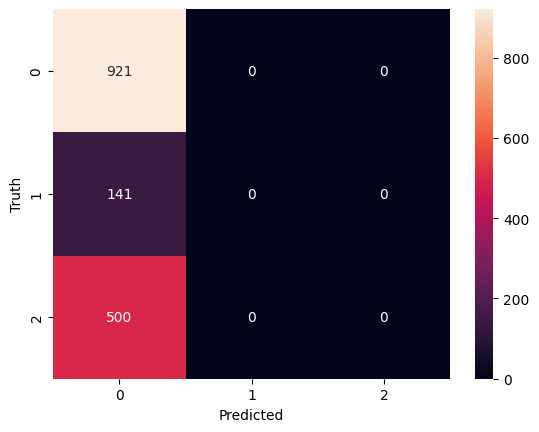

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm_mbert = confusion_matrix(y_test, y_predicted_mbert)
cm_mbert

from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm_mbert, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#print(classification_report(y_test, y_predicted_mbert))